# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [62]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [63]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [64]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Write your code here to read the data
path = "/content/drive/MyDrive/PythonCourse/foodhub_order.csv"
data = pd.read_csv(path)

In [66]:
# View the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [67]:
# Write your code here
data.shape

(1898, 9)

#### Observations: The dataset has 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [68]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The order_id, customer_id, food_preparation_time,delivery_time are integers and cost_of_the_order float which are numeric types. The restaurant_name, cuisine_type, day_of_the_week and rating are object types.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [69]:
# Write your code here
data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations:There are no missing/null values in the data.


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [70]:
#describe() to get the statistics summary of the data and .T to transpose to make it easier to read
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### Observations: The minimum time it takes for food to be prepared once an order is placed is 20 minutes. Average time it takes is 27.37 minutes, and the maximum time is 35 minutes.


### **Question 5:** How many orders are not rated? [1 mark]

In [71]:
#List the Unique categorical levels in the rating column and provides the count for each category
data['rating'].value_counts()

,rating
Not given,736
5,588
4,386
3,188


#### Observations: There are 736 orders that were not given a rating.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

**Cost of Order**

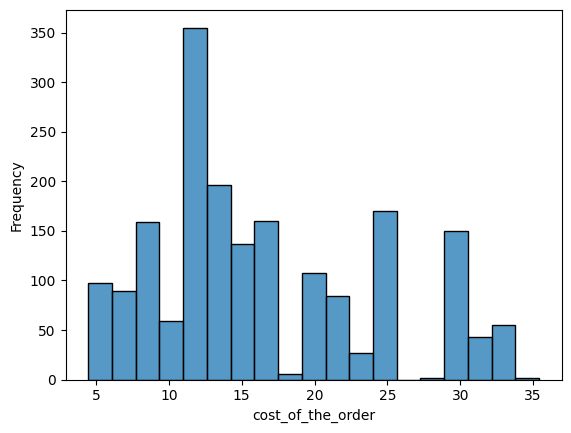

In [72]:
# Histogram for cost_of_the_order variable
sns.histplot(data=data, x='cost_of_the_order');
plt.ylabel('Frequency');

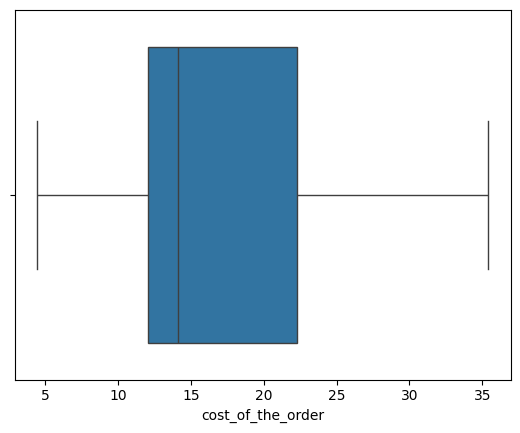

In [73]:
# Boxplot for cost_of_the_order
sns.boxplot(data=data, x='cost_of_the_order');

#### Observations: The median (50th percentile) of the cost of orders are around 14 dollars. The average is about 16.50 dollars.

**Food Preparation Time**





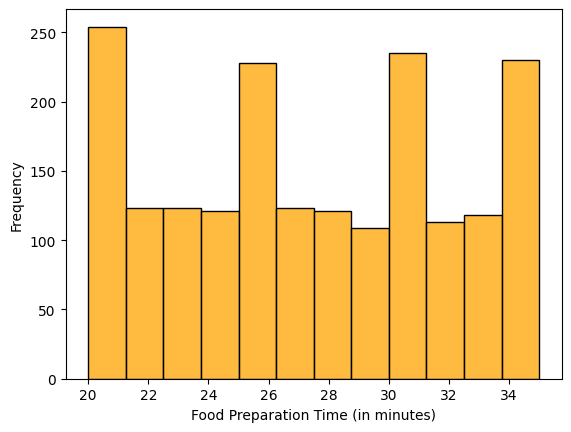

In [74]:
# Histogram for food_preparation_time variable
sns.histplot(data=data, x='food_preparation_time', color='orange');
plt.ylabel('Frequency');
plt.xlabel('Food Preparation Time (in minutes)');


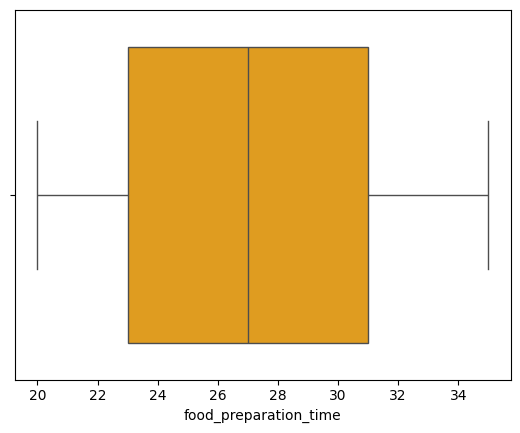

In [75]:
# Boxplot for food_preparation_time
sns.boxplot(data=data, x='food_preparation_time', color='orange');

#### Observations: The maximum time it takes to prepare food is 35 minutes, and the minimum is 20 minutes.

**Delivery Time**

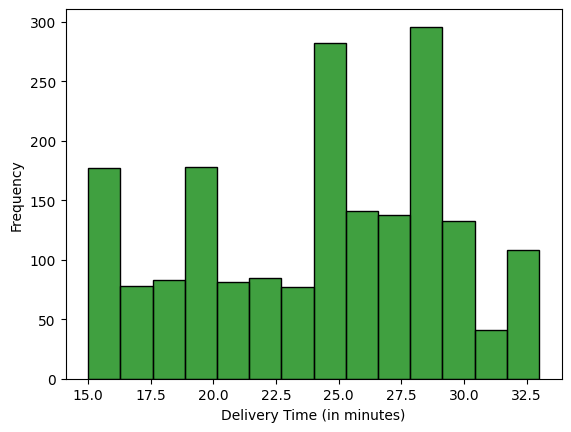

In [76]:
# Histogram for delivery_time variable
sns.histplot(data=data, x='delivery_time', color='green');
plt.ylabel('Frequency');
plt.xlabel('Delivery Time (in minutes)');

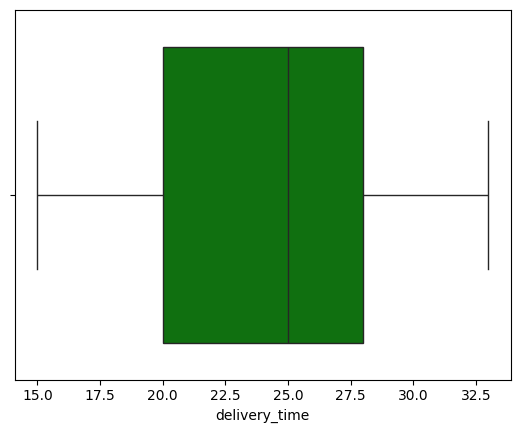

In [77]:
# Boxplot for delivery_time
sns.boxplot(data=data, x='delivery_time', color='green');

#### Observations: The median of food delivery time is 25 minutes. The max time is 33 minutes and the minimum is 15 minutes.

**Day of the week**

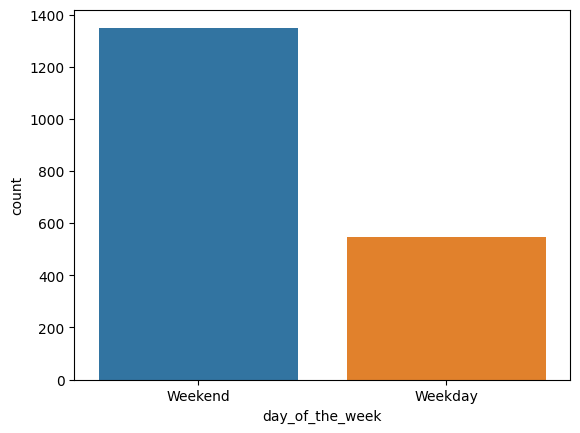

In [78]:
# Bar graph (countplot) for day_of_the_week variable
sns.countplot(data=data, x='day_of_the_week', hue = 'day_of_the_week');

#### Observations: There are more orders on the weekend than on the weekdays.

**Rating**

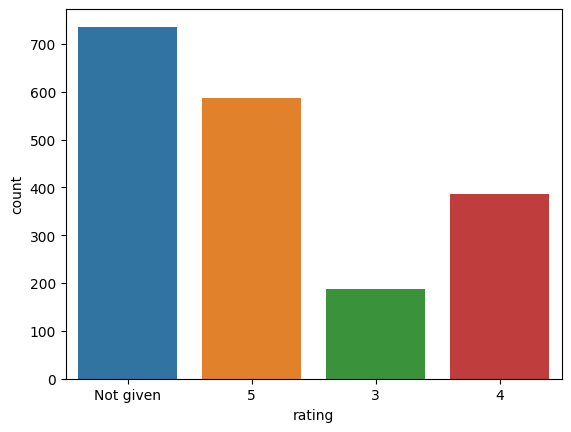

In [79]:
# Bar graph (countplot) for rating variable
sns.countplot(data=data, x='rating', hue = 'rating');

#### Observations: 736 orders were not given a rating. 588 orders got 5 star rating. Then 386 orders got 4 star and 188 got 3 stars.

**Cuisine Type**

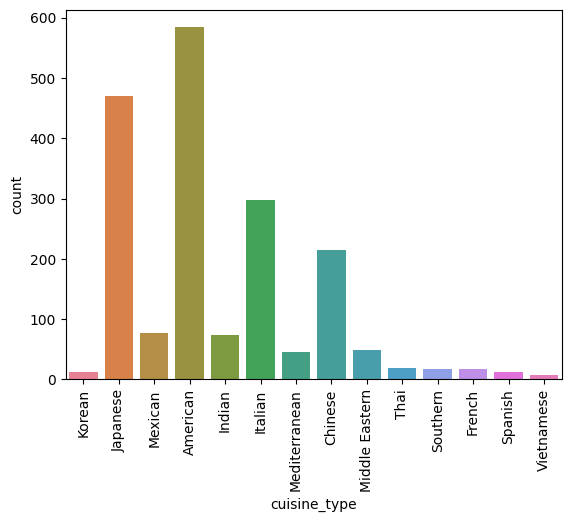

In [80]:
# Bar grap (countplot) for cuisine_type vairable
plt.xticks(rotation=90);
sns.countplot(data=data, x='cuisine_type', hue='cuisine_type');


#### Observations: American cuisine type has the highest frequency ordered compared to the rest cuisine types.

In [81]:
data['restaurant_name'].nunique()

178

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [82]:
# Get order_ids count and group them by restaurant name
data['order_id'].groupby(data['restaurant_name']).count().sort_values(ascending=False).head(5)

,order_id
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm are the top 5 restaurants. Shake Shack has the highest number of orders received.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [83]:
# Create a new dataframe where the day_of_the_week values equals "Weekend" and then count the values by cuisine type
weekend_data = data[data['day_of_the_week'] == 'Weekend']
weekend_data['cuisine_type'].value_counts()

,cuisine_type
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15
French,13


#### Observations: The most popoular cuisine on the weekends is American cuisine.


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [84]:
# Create new dataframe where cost_of_order is larger than 20
cost_data = data[data['cost_of_the_order'] > 20]
#Get number of rows in new dataframe and divide by total number of rows in original dataframe, then multiply by 100 to get percent
cost_data.shape[0] / data.shape[0] * 100

29.24130663856691

#### Observations: The percentage of the orders that cost more than 20 dollars is 29.2%.


### **Question 10**: What is the mean order delivery time? [1 mark]

In [85]:
# Find mean of delivery time
data['delivery_time'].mean()

24.161749209694417

#### Observations: The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [86]:
# Get the customer ids and count each value
data['customer_id'].value_counts().sort_values(ascending=False).head(3)

,customer_id
52832,13
47440,10
83287,9


#### Observations: The top three most frequent customer id's are 52832, 47440 and 83287.


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


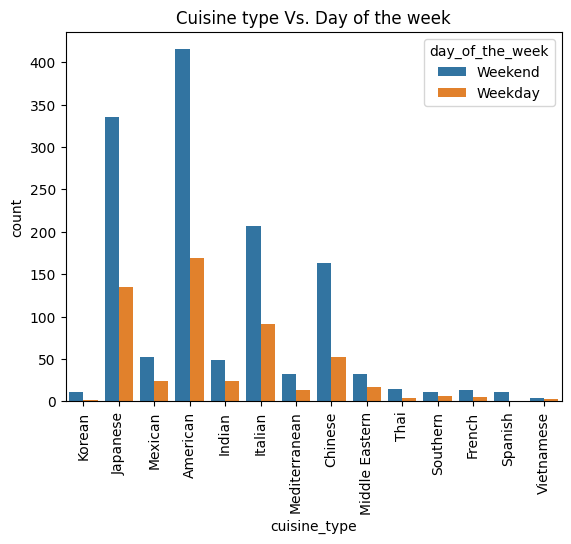

In [87]:
#Bar graph for cuisine type and day of the week
plt.title('Cuisine type Vs. Day of the week') # set title
plt.xticks(rotation=90); #rotate labels on x axis
sns.countplot(data=data, x='cuisine_type', hue='day_of_the_week');

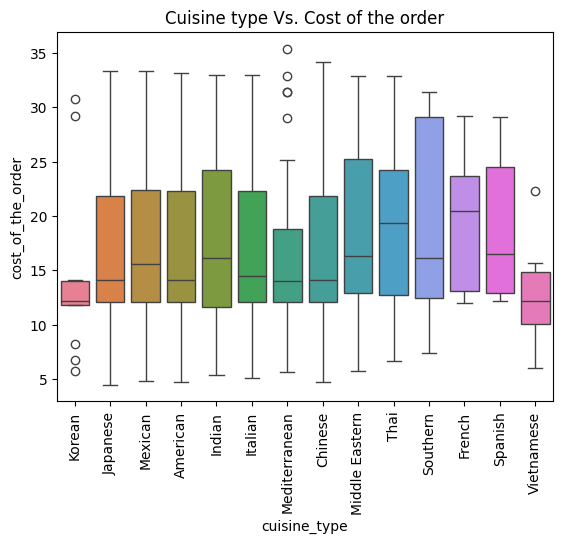

In [88]:
# Boxplot for the cost of the order and cuisine type
plt.title('Cuisine type Vs. Cost of the order') # set title
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = data, hue = "cuisine_type");
plt.xticks(rotation = 90);


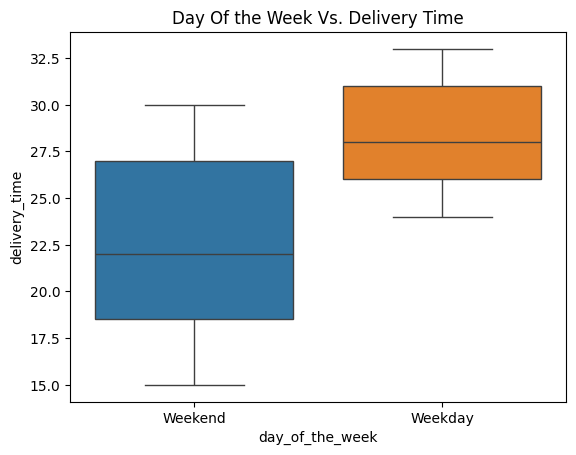

In [89]:
# Boxplot for day of the week and delivery time
plt.title('Day Of the Week Vs. Delivery Time') # set title
sns.boxplot(x = 'day_of_the_week', y = 'delivery_time', data = data, hue = "day_of_the_week");


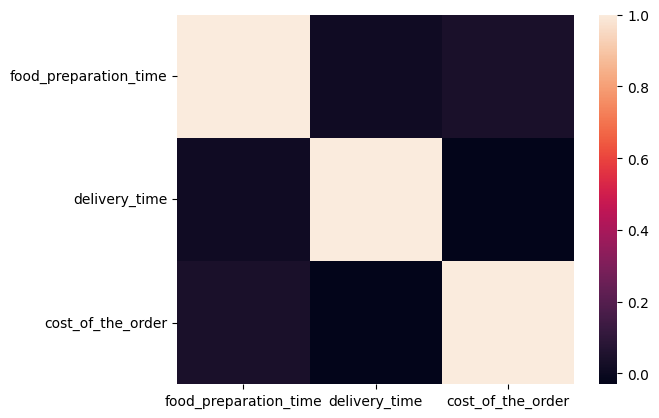

In [90]:
#Heatmap showing the correlation between food preparation time, delivery time, and cost of order
sns.heatmap(data=data[['food_preparation_time','delivery_time','cost_of_the_order']].corr()) ;

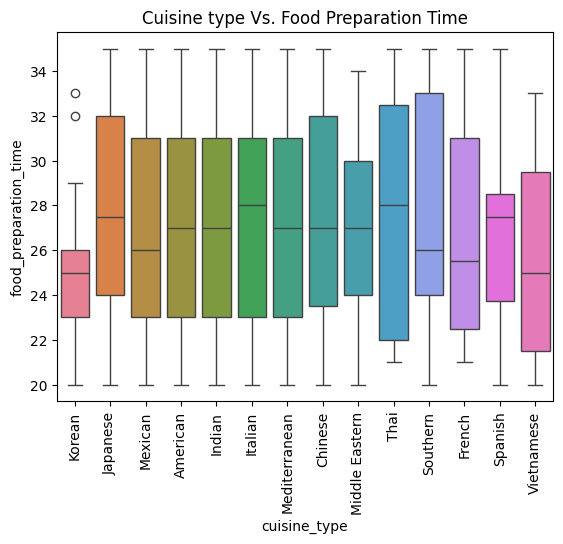

In [91]:
# Boxplot for the cuisine type and food preparation time
plt.title('Cuisine type Vs. Food Preparation Time') # set title
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = data, hue = "cuisine_type");
plt.xticks(rotation = 90);

#### Observations: The observations for the multivariate analysis is that there is no correlation between delivery time and costo of order. Also the maximum time to prepare food for Korean and Vietnamese cuisine seems less than the rest.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [92]:
# Get a new dataframe with no 'not given' rows present
ratings_data = data[data['rating'] != 'Not given'].copy()

#Convert rating column to int type
ratings_data['rating'] = ratings_data['rating'].astype(float)

#Copy filtered dataframe to find average ratings
average_data = ratings_data.copy()

#Get mean/average of each restaurant
average_data = average_data.groupby('restaurant_name')['rating'].mean()
average_data = average_data.reset_index()
average_data

,restaurant_name,rating
0,'wichcraft,5.000000
1,12 Chairs,4.500000
2,5 Napkin Burger,4.000000
3,67 Burger,5.000000
4,Amma,4.500000
...,...,...
151,Zero Otto Nove,4.000000
152,brgr,3.000000
153,da Umberto,5.000000
154,ilili Restaurant,4.153846


In [93]:
#Create new dataframe for restaurants with rating count more than 50
over50_data = ratings_data.copy()
over50_data = over50_data.groupby('restaurant_name')['rating'].count()
over50_data = over50_data[over50_data > 50]
over50_data = over50_data.reset_index()
over50_data

,restaurant_name,rating
0,Blue Ribbon Fried Chicken,64
1,Blue Ribbon Sushi,73
2,Shake Shack,133
3,The Meatball Shop,84


In [94]:
#Combine the data frames to see which restaurants fit in the criteria
criteria_df = pd.merge(over50_data, average_data, on='restaurant_name')
criteria_df

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


In [95]:
#Filter restaurants to average ratings greater than 4
criteria_df = criteria_df[criteria_df['rating_y'] > 4]
criteria_df

,restaurant_name,rating_x,rating_y
0,Blue Ribbon Fried Chicken,64,4.328125
1,Blue Ribbon Sushi,73,4.219178
2,Shake Shack,133,4.278195
3,The Meatball Shop,84,4.511905


#### Observations: The restaurants that fill the criteria to get the promotional offer is Blue Ribbon Fried Chicken, Blue Ribbon Sushi, Shake Shack, and The Meatball Shop.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [96]:
# Write function to find net revenue
def net_revenue(cost):
  if cost > 20:
    return cost * 0.25
  elif cost > 5:
    return cost * 0.15
  else:
    return cost * 0



In [97]:
#Copy the cost of the order column
revenue_df = data['cost_of_the_order'].copy()

#Apply function to find revenue and sum the total
total_net = revenue_df.apply(net_revenue).sum()
total_net

6166.303

#### Observations:The net revenue generated by the companys charges is $6166.3


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [98]:
# Copy dataframe
total_time = data.copy()
#new column equals food preparation time plus delivery
total_time['food_delivery_time'] = total_time['food_preparation_time'] + total_time['delivery_time']
#Get orders that take more than 60 minutes to get delivered
over60 = total_time.loc[total_time['food_delivery_time'] > 60]
#Calculate percentage
over60.shape[0] / data.shape[0] * 100



10.537407797681771

#### Observations: The total percentage of orders that take more than 60 minutes to get delivered is about 10.54%.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [99]:
# Find mean delivery time for weekdays
weekdays_delivery  = data[data['day_of_the_week'] == 'Weekday']
weekdays_delivery['delivery_time'].mean()

28.340036563071298

In [100]:
#Find mean delivery time for weekends
weekend_delivery = data[data['day_of_the_week'] == 'Weekend']
weekend_delivery['delivery_time'].mean()

22.4700222057735

#### Observations: The mean delivery time for the weekdays is 28 minutes and the weekend delivery time is 22 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The weekdays could have longer delivery times due to rush hour, compared to the weekends.
* Vietnamese cuisine has the lowest cost on average compared to the rest of the cuisine types.

### Recommendations:

*  I would recommend the business to offer an incentive to give a rating, due to the large amount of orders not given a rating. For example, "Receive an 'x' amount of money or percent off your next order".
* The business can add more American, Japanese and Italian options since those seem to be the cuisine types most ordered.


---